# PageRank Algorithm. NetworkX

In [2]:
# pip install networkx

In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

Let's generate a random graph with `15 nodes` using networkx library. Here, `0.5` is the probability of having edge between nodes in a graph. 

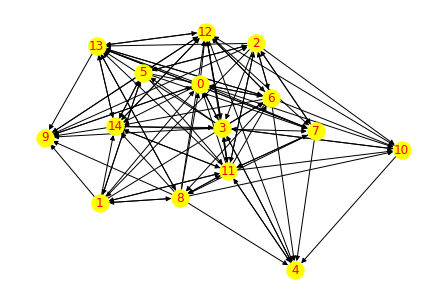

In [4]:
# create a directed graph
graph = nx.gnp_random_graph(15, 0.5, directed=True)

#draw a graph
nx.draw(graph, with_labels=True, font_color='red', font_size=12, node_color='yellow')

#plot a graph
plt.show()

In [5]:
# number of nodes in a graph 
graph.number_of_nodes()

15

In [6]:
# number of edges (connections) in a graph
graph.number_of_edges()

99

In [7]:
# neighbors of a node '0'
list(graph.neighbors(0))

[3, 7, 9, 10, 12, 13, 14]

This time, in order to calculate each node's pagerank, we will use random walk score for each node by starting with a random node. Number of iterations is 500000. 

In [8]:
rank_dict={}

# taking a random node as the starting node:
x = rd.randint(0, 15)

#Setting random walk score of each node to zero
for j in range(0, 15):
      rank_dict[j] = 0

#Incrementing score of starting node
rank_dict[x] = rank_dict[x] + 1

#iterating process for 50000 times and updating score
for i in range(500000):
      #storing list of neighboring nodes in list
      list_n = list(graph.neighbors(x))
      
      #if length of list is zero then taking another node and process starts
      if(len(list_n)==0):
            x = rd.randint(0, 15)
            rank_dict[x] = rank_dict[x]+1
      
      #else choose any node from the list and continue the process by updating score to that node
      else:
            x = rd.choice(list_n)
            rank_dict[x] = rank_dict[x] + 1
print("Random Walk Score Updated")

Random Walk Score Updated


In [9]:
rank_dict

{0: 33992,
 1: 11423,
 2: 27022,
 3: 46183,
 4: 35297,
 5: 16592,
 6: 34096,
 7: 35989,
 8: 24493,
 9: 30851,
 10: 25223,
 11: 40333,
 12: 55886,
 13: 46902,
 14: 35719}

Once we got the scores stored in the dictionary we need to normalize score by dividing the random walk score by no of iterations.

In [10]:
for j in range(0,15):
    rank_dict[j] = rank_dict[j] / 500000

In [11]:
rank_dict

{0: 0.067984,
 1: 0.022846,
 2: 0.054044,
 3: 0.092366,
 4: 0.070594,
 5: 0.033184,
 6: 0.068192,
 7: 0.071978,
 8: 0.048986,
 9: 0.061702,
 10: 0.050446,
 11: 0.080666,
 12: 0.111772,
 13: 0.093804,
 14: 0.071438}

Now let's get the random scores for the graph by using built-in function pagerank in networkx library and sort the obtained dictionary based on the scores.

In [12]:
pagerank = nx.pagerank(graph)

#sorting both dictionaries based on items
pagerank_sorted = sorted(pagerank.items(), key = lambda v:(v[1], v[0]), reverse=True)

Now sort the dictionary we generated by an algorithm and store it.

In [13]:
rank_dict_sorted = sorted(rank_dict.items(), key = lambda v:(v[1], v[0]), reverse=True)

Let's compare both results: 

In [14]:
#display the order

print("The order generated by our implementation is\n")

for i in rank_dict_sorted:
    print(i[0], end=" ")

print("\n\nThe order generated by networkx library is\n")

for i in pagerank_sorted:
    print(i[0], end=" ")

The order generated by our implementation is

12 13 3 11 7 14 4 6 0 9 2 10 8 5 1 

The order generated by networkx library is

12 13 3 11 14 7 4 0 6 9 2 10 8 5 1 

## Class Examples

Now, let's look at some known problems: 

#### "Spider Trap" Problem

![alt](https://raw.githubusercontent.com/tnurbek/ds702/main/Lab11/spidertrap.JPG)

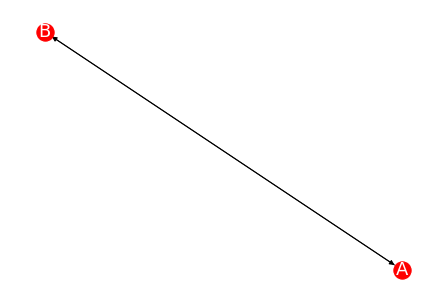

In [15]:
# create a directed graph
# graph = nx.Graph().to_directed()
graph = nx.DiGraph()
graph.add_edge('A', 'B')
graph.add_edge('B', 'A')

#draw a graph
nx.draw(graph, with_labels=True, font_color='white', font_size=18, node_color='red')

#plot a graph
plt.show()

In [16]:
nx.pagerank(graph)

{'A': 0.5, 'B': 0.5}

#### "Dead End" Problem

![](https://raw.githubusercontent.com/tnurbek/ds702/main/Lab11/deadend.JPG)

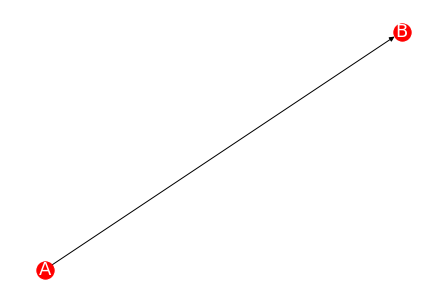

In [17]:
# create a directed graph
graph = nx.DiGraph()
graph.add_edge('A', 'B')

#draw a graph
nx.draw(graph, with_labels=True, font_color='white', font_size=18, node_color='red')

#plot a graph
plt.show()

In [18]:
nx.pagerank(graph)

{'A': 0.35087736193586194, 'B': 0.649122638064138}

#### Drawings

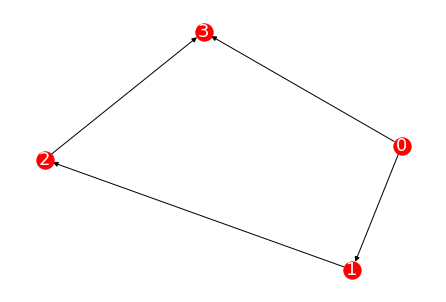

In [34]:
lst = [(0, 1), (2, 3), (1, 2), (0, 3)]
# create a directed graph
graph = nx.DiGraph()
# create a graph from a list of tuples 
graph.add_edges_from(lst)

#draw a graph
nx.draw(graph, with_labels=True, font_color='white', font_size=18, node_color='red')

#plot a graph
plt.show()

In [21]:
nx.pagerank(graph)

{0: 0.12593141311147116,
 1: 0.17945268439422313,
 2: 0.2784666536163115,
 3: 0.4161492488779942}

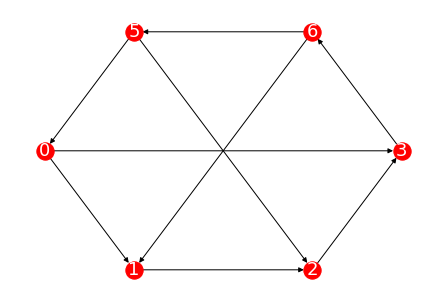

In [35]:
lst = [(0, 1), (2, 3), (1, 2), (0, 3), (6, 5), (5, 2), (6, 1), (3, 6), (5, 0)]
# create a directed graph
graph = nx.DiGraph()
graph.add_edges_from(lst)

# draw a graph 
nx.draw_shell(graph, with_labels=True, font_color='white', font_size=18, node_color='red')

#plot a graph
plt.show()

In [36]:
nx.pagerank(graph)

{0: 0.075496759895528,
 1: 0.15090102596833135,
 2: 0.20376314438093063,
 3: 0.2302839209368425,
 6: 0.22074009572354125,
 5: 0.11881505309482601}

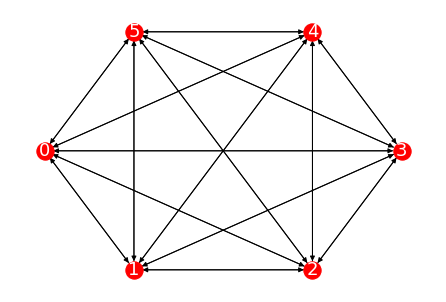

In [46]:
lst = [(i, j) for i in range(6) for j in range(6) if i != j]
# create a directed graph
graph = nx.DiGraph()
graph.add_edges_from(lst)

# draw a graph 
nx.draw_shell(graph, with_labels=True, font_color='white', font_size=18, node_color='red')

#plot a graph
plt.show()

In [45]:
nx.pagerank(graph)

{0: 0.14285714285714285,
 1: 0.14285714285714285,
 2: 0.14285714285714285,
 3: 0.14285714285714285,
 4: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285}